In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [76]:
ht_dt = pd.read_csv("M://project//heart.csv")

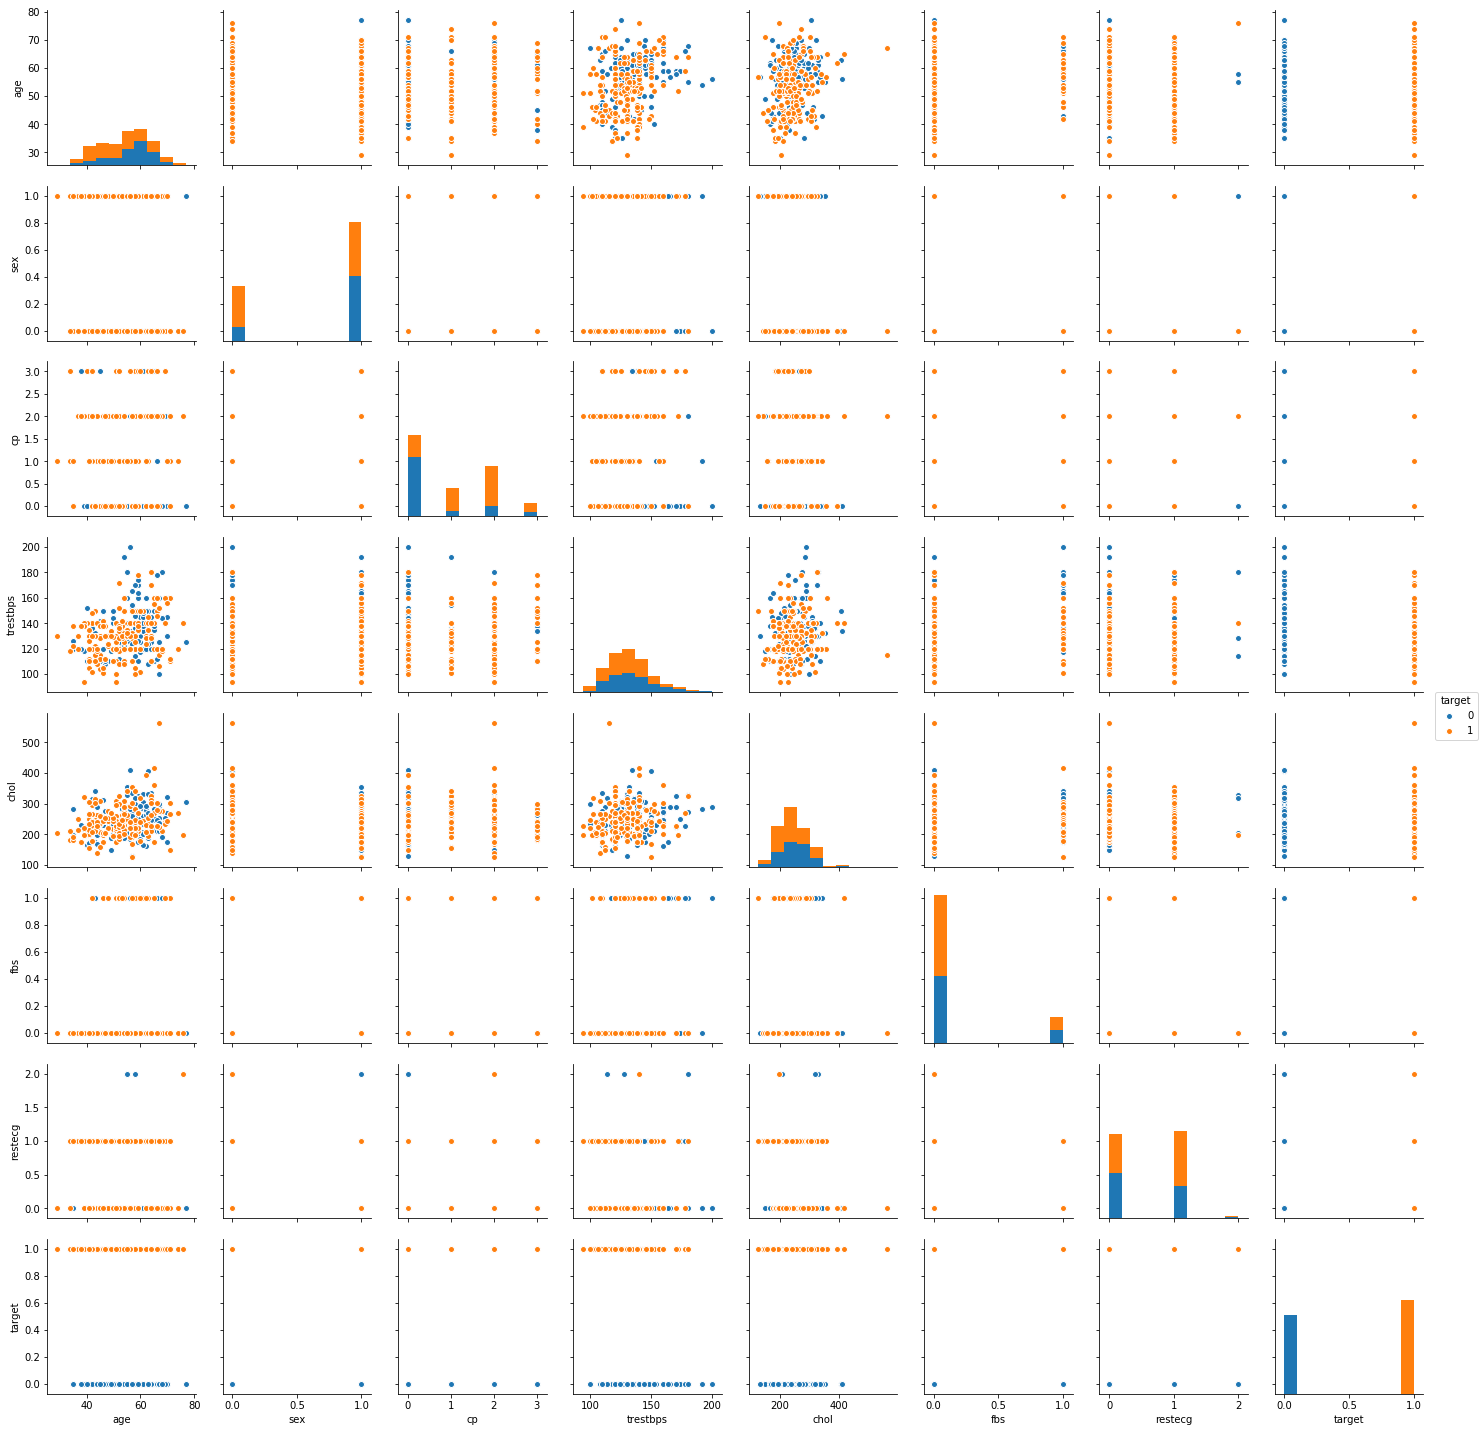

In [77]:
set1 = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'target']
set1_dt = ht_dt[set1]
sns.pairplot(set1_dt, hue="target")

In [78]:
y=ht_dt.target
x=ht_dt.drop(["target"],axis=1)





In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
scores_accuracy=[]


In [80]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(x_train,y_train)


prediction_of_probability = rf.predict_proba(x)
rf_score = rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
scores_accuracy.append(["RF",rf_score])
print("random forest result: ", rf.score(x_test,y_test))

random forest result:  0.8131868131868132


In [81]:
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [82]:
bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [83]:
x['prob_0'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)

In [84]:
x['prob_1'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)

In [85]:
x.drop(columns="prob_0",axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prob_1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0.9
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0.9
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0.9
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,0.9
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,0.9
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,0.8
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1.0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1.0


In [86]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rlf = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0).fit(X_train1,y_train1)
y_pred1 =rlf.predict(X_test1)
from sklearn import metrics
# classification rate
T=metrics.accuracy_score(y_test1, y_pred1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9344262295081968


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.934426,0.941176,0.941176,0.941176


In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.934426,0.941176,0.941176,0.941176


In [90]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))  

Mean Absolute Error: 0.06557377049180328
Mean Squared Error: 0.06557377049180328
Root Mean Squared Error: 0.25607375986579195


In [59]:

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.8131868131868132


In [60]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.6593406593406593 


In [61]:

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.5604395604395604


In [62]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8351648351648352


In [63]:

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.7362637362637363


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.736264,0.809524,0.68,0.73913


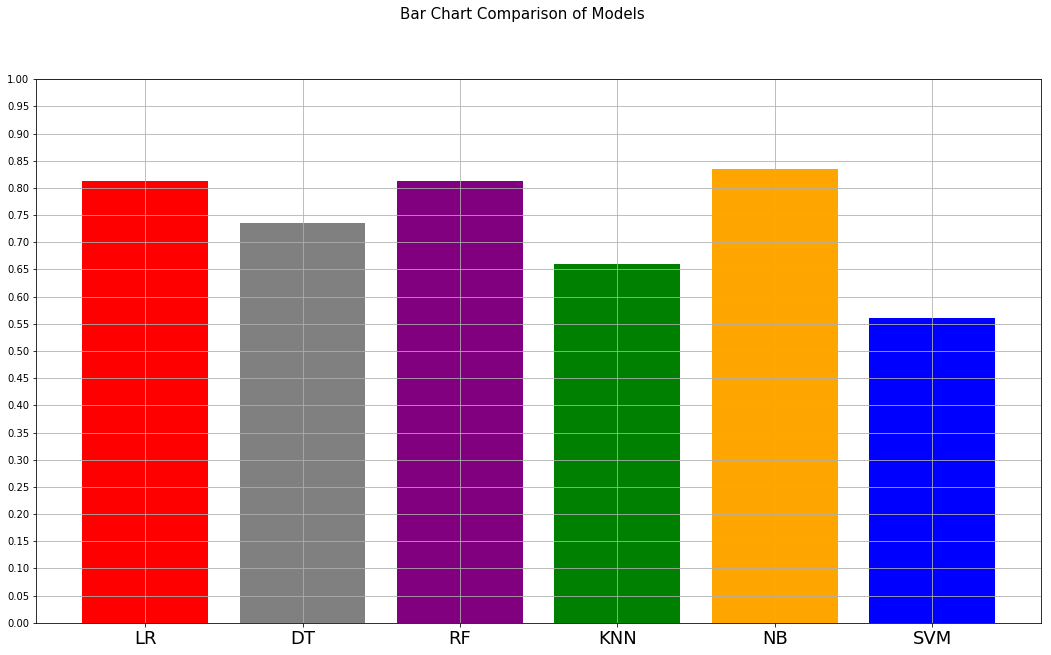

In [65]:
algorithms=("LR","DT","RF","KNN","NB","SVM")
scores = (lr_score,dt_score,rf_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

In [66]:

scores_accuracy1=[]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train1,y_train1)

lr_score1 = lr.score(X_test1,y_test1)
scores_accuracy1.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test1,y_test1)))

test accuracy 0.9672131147540983


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train1,y_train1)
prediction = knn.predict(X_test1)

knn_score1 = knn.score(X_test1,y_test1)
scores_accuracy1.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test1,y_test1)))

 9 nn score: 0.6721311475409836 


In [68]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train1,y_train1)

svm_score1 = svm.score(X_test1,y_test1)
scores_accuracy1.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test1,y_test1))

accuracy of svm algo:  0.5737704918032787


In [69]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train1,y_train1)
nb_score1 = nb.score(X_test1,y_test1)
scores_accuracy1.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(X_test1,y_test1))

print accuracy of naive bayes algo:  0.9672131147540983
